In [143]:
# Import dependencies
import hvplot.pandas
import pandas as pd
import numpy as np
import seaborn as sns
from api_keys import geoapify_key
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

ModuleNotFoundError: No module named 'api_keys'

In [ ]:
# Read the data into a Pandas DataFrame
chronic_disease_df = pd.read_csv('Resources/U.S._Chronic_Disease_Indicators 2.csv')
chronic_disease_df.head()

In [ ]:
chronic_disease_df.info

In [ ]:
chronic_disease_df.columns

In [ ]:
chronic_disease_df.rename(columns={
    'YearStart': 'year_started',
    'YearEnd': 'year_ended',
    'LocationAbbr': 'state_abbr',
    'LocationDesc': 'state'}, inplace=True)

chronic_disease_df

In [ ]:
cleaned_diseases_df = pd.DataFrame({
    
})

In [ ]:
datasource_groupby = chronic_disease_df.groupby('DataSource')['Topic'].max()
datasource_groupby.head()

In [ ]:
datasource_groupby = chronic_disease_df[chronic_disease_df['DataSource'] == 'BRFSS']
datasource_groupby.head()

In [ ]:
chronic_disease_df.info()

In [ ]:
chronic_disease_df_cleaned = chronic_disease_df.drop(columns=['Response','StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3',
                                 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3',
                                 'DataValueFootnoteSymbol', 'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'TopicID', 'QuestionID', 
                                 'DataValueTypeID'])
chronic_disease_df_cleaned.head()

In [ ]:
chronic_disease_df_cleaned.columns

In [ ]:
chronic_disease_df_cleaned.info()

In [144]:
chronic_disease_df_cleaned['DataValue'] = chronic_disease_df_cleaned['DataValue'].fillna('')
chronic_disease_df_cleaned.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,Geolocation,LocationID,StratificationCategoryID1,StratificationID1,point,Longitude,Latitude
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,POINT (-92.27449074299966 34.74865012400045),5,SEX,SEXM,POINT,(-92.27449074299966,34.74865012400045)
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,POINT (-114.3637300419997 43.682630005000476),16,SEX,SEXM,POINT,(-114.3637300419997,43.682630005000476)
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,%,Crude Prevalence,,NaN,Grade,Grade 12,POINT (-86.14996019399968 39.766910452000445),18,GRADE,GRD 12.00,POINT,(-86.14996019399968,39.766910452000445)
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",Number,Number,54.0,54.0,Overall,Overall,POINT (-93.81649055599968 42.46940091300047),19,OVERALL,OVR,POINT,(-93.81649055599968,42.46940091300047)
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,10.3,Age,Age 18-44,POINT (-93.81649055599968 42.46940091300047),19,AGE,AGE1844,POINT,(-93.81649055599968,42.46940091300047)


In [145]:
grouped_counts = chronic_disease_df_cleaned.groupby(['DataSource', 'Topic'])['Topic'].count()
print(grouped_counts)

DataSource                                   Topic                                          
ACS                                          Social Determinants of Health                       3224
AEDS                                         Alcohol                                              165
ANRF                                         Tobacco                                              165
BRFSS                                        Alcohol                                            16460
                                             Arthritis                                          18645
                                             Asthma                                              4895
                                             Cancer                                              4838
                                             Cardiovascular Disease                             10117
                                             Chronic Obstructive Pulmonary Disease         

In [146]:
dataSource_df = chronic_disease_df_cleaned[['DataSource','state','Topic','Question', 'Geolocation', 'year_started', 'year_ended']]
dataSource_df.head()

,DataSource,state,Topic,Question,Geolocation,year_started,year_ended
0,BRFSS,Arkansas,Diabetes,Diabetes among adults,POINT (-92.27449074299966 34.74865012400045),2019,2019
1,BRFSS,Idaho,Diabetes,Diabetes among adults,POINT (-114.3637300419997 43.682630005000476),2019,2019
2,YRBSS,Indiana,Sleep,Short sleep duration among high school students,POINT (-86.14996019399968 39.766910452000445),2019,2019
3,NVSS,Iowa,Asthma,"Asthma mortality among all people, underlying cause",POINT (-93.81649055599968 42.46940091300047),2019,2019
4,BRFSS,Iowa,Asthma,Current asthma among adults,POINT (-93.81649055599968 42.46940091300047),2019,2019


In [147]:
grouped_dataSource = dataSource_df.groupby(['state', 'Topic'])['Topic'].count()
grouped_dataSource

state    Topic                                          
Alabama  Alcohol                                            467
         Arthritis                                          339
         Asthma                                             197
         Cancer                                             424
         Cardiovascular Disease                             580
                                                           ... 
Wyoming  Nutrition, Physical Activity, and Weight Status    475
         Oral Health                                        246
         Sleep                                               98
         Social Determinants of Health                      360
         Tobacco                                            295
Name: Topic, Length: 1042, dtype: int64

In [148]:
grouped_counts_df = grouped_dataSource.reset_index(name='count')
grouped_counts_df.head()

,state,Topic,count
0,Alabama,Alcohol,467
1,Alabama,Arthritis,339
2,Alabama,Asthma,197
3,Alabama,Cancer,424
4,Alabama,Cardiovascular Disease,580


In [149]:
sorted_grouped_counts_df = grouped_counts_df.sort_values(by=['count'], ascending=False, inplace=False)
sorted_grouped_counts_df.head()

,state,Topic,count
402,Maryland,Cardiovascular Disease,580
516,Montana,Cardiovascular Disease,580
383,Maine,Cardiovascular Disease,580
744,Pennsylvania,Cardiovascular Disease,580
970,Washington,Cardiovascular Disease,580


In [150]:
United_States_df = sorted_grouped_counts_df[sorted_grouped_counts_df['state'] == 'United States']
United_States_df

,state,Topic,count
876,United States,Cardiovascular Disease,577
878,United States,Chronic Obstructive Pulmonary Disease,509
886,United States,"Nutrition, Physical Activity, and Weight Status",495
872,United States,Alcohol,467
882,United States,Health Status,466
875,United States,Cancer,422
889,United States,Social Determinants of Health,360
883,United States,Immunization,348
873,United States,Arthritis,339
880,United States,Diabetes,332


Text(0.5, 1.0, 'Most mentioned chronic diseases in the USA')

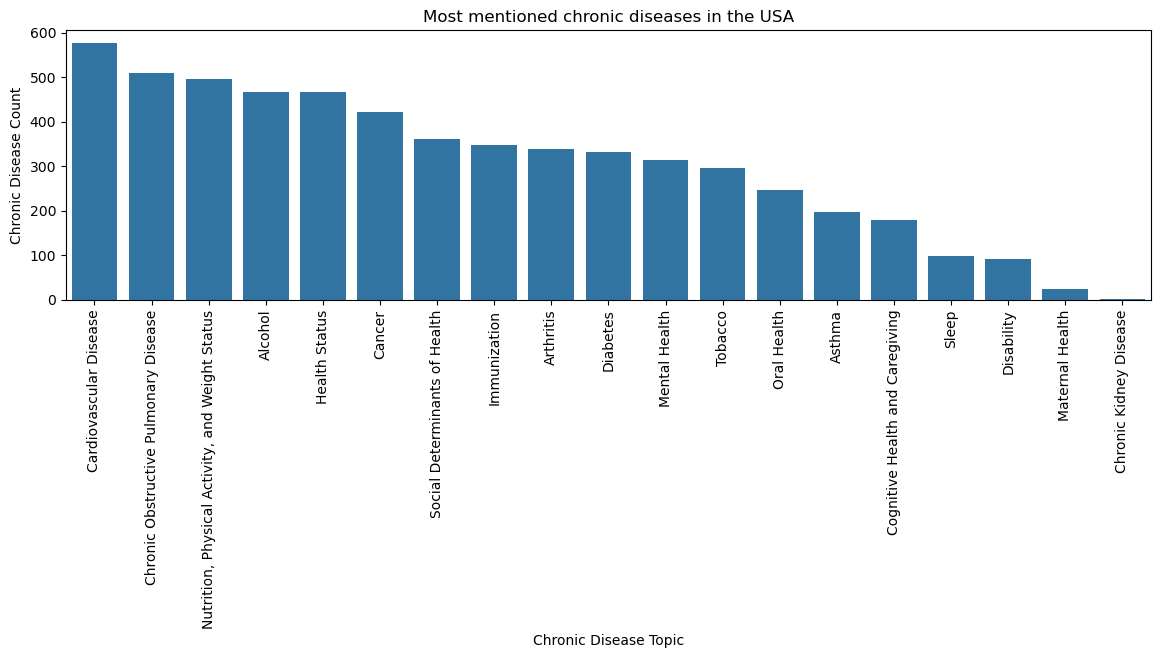

In [151]:
plt.figure(figsize=(14, 3.5))
sns.barplot(x='Topic', y='count', data=United_States_df)
plt.xticks(rotation=90)

plt.xlabel('Chronic Disease Topic')
plt.ylabel('Chronic Disease Count')
plt.title('Most mentioned chronic diseases in the USA')

In [152]:
max_counts = sorted_grouped_counts_df.groupby('state')['count'].max().reset_index()
max_counts.head(10)

,state,count
0,Alabama,580
1,Alaska,580
2,Arizona,580
3,Arkansas,580
4,California,580
5,Colorado,580
6,Connecticut,580
7,Delaware,580
8,District of Columbia,580
9,Florida,580


Text(0.5, 1.0, 'Most mentioned chronic diseases in the States')

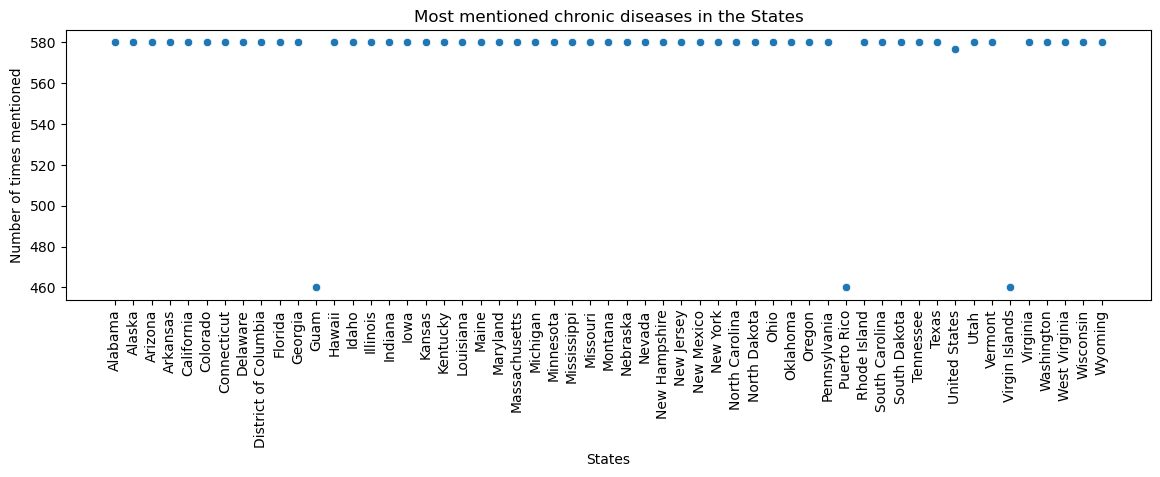

In [153]:
plt.figure(figsize=(14, 3.5))
sns.scatterplot(x='state', y='count', data=max_counts)
plt.xticks(rotation=90)

plt.xlabel('States')
plt.ylabel('Number of times mentioned')
plt.title('Most mentioned chronic diseases in the States')

In [154]:
chronic_disease_df_cleaned.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,Geolocation,LocationID,StratificationCategoryID1,StratificationID1,point,Longitude,Latitude
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,POINT (-92.27449074299966 34.74865012400045),5,SEX,SEXM,POINT,(-92.27449074299966,34.74865012400045)
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,POINT (-114.3637300419997 43.682630005000476),16,SEX,SEXM,POINT,(-114.3637300419997,43.682630005000476)
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,%,Crude Prevalence,,NaN,Grade,Grade 12,POINT (-86.14996019399968 39.766910452000445),18,GRADE,GRD 12.00,POINT,(-86.14996019399968,39.766910452000445)
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",Number,Number,54.0,54.0,Overall,Overall,POINT (-93.81649055599968 42.46940091300047),19,OVERALL,OVR,POINT,(-93.81649055599968,42.46940091300047)
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,10.3,Age,Age 18-44,POINT (-93.81649055599968 42.46940091300047),19,AGE,AGE1844,POINT,(-93.81649055599968,42.46940091300047)


In [155]:
chronic_disease_df_cleaned['Geolocation'][0].split(' ')

['POINT', '(-92.27449074299966', '34.74865012400045)']

In [156]:
chronic_disease_df_cleaned[['point', 'Longitude', 'Latitude']] = chronic_disease_df_cleaned['Geolocation'].str.split(' ', expand=True)
chronic_disease_df_cleaned.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,Geolocation,LocationID,StratificationCategoryID1,StratificationID1,point,Longitude,Latitude
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,POINT (-92.27449074299966 34.74865012400045),5,SEX,SEXM,POINT,(-92.27449074299966,34.74865012400045)
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,POINT (-114.3637300419997 43.682630005000476),16,SEX,SEXM,POINT,(-114.3637300419997,43.682630005000476)
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,%,Crude Prevalence,,NaN,Grade,Grade 12,POINT (-86.14996019399968 39.766910452000445),18,GRADE,GRD 12.00,POINT,(-86.14996019399968,39.766910452000445)
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",Number,Number,54.0,54.0,Overall,Overall,POINT (-93.81649055599968 42.46940091300047),19,OVERALL,OVR,POINT,(-93.81649055599968,42.46940091300047)
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,10.3,Age,Age 18-44,POINT (-93.81649055599968 42.46940091300047),19,AGE,AGE1844,POINT,(-93.81649055599968,42.46940091300047)


In [157]:
chronic_disease_df_final = chronic_disease_df_cleaned.drop(columns=['point', 'Geolocation'])

In [158]:
chronic_disease_df_final.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,LocationID,StratificationCategoryID1,StratificationID1,Longitude,Latitude
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,5,SEX,SEXM,(-92.27449074299966,34.74865012400045)
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,16,SEX,SEXM,(-114.3637300419997,43.682630005000476)
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,%,Crude Prevalence,,NaN,Grade,Grade 12,18,GRADE,GRD 12.00,(-86.14996019399968,39.766910452000445)
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",Number,Number,54.0,54.0,Overall,Overall,19,OVERALL,OVR,(-93.81649055599968,42.46940091300047)
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,10.3,Age,Age 18-44,19,AGE,AGE1844,(-93.81649055599968,42.46940091300047)


In [159]:
chronic_disease_df_final['Longitude'] = chronic_disease_df_final['Longitude'].str.replace('(', '', regex=False)
chronic_disease_df_final['Latitude'] = chronic_disease_df_final['Latitude'].str.replace(')', '', regex=False)
chronic_disease_df_final.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,LocationID,StratificationCategoryID1,StratificationID1,Longitude,Latitude
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,5,SEX,SEXM,-92.27449074299966,34.74865012400045
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,16,SEX,SEXM,-114.3637300419997,43.682630005000476
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,%,Crude Prevalence,,NaN,Grade,Grade 12,18,GRADE,GRD 12.00,-86.14996019399968,39.766910452000445
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",Number,Number,54.0,54.0,Overall,Overall,19,OVERALL,OVR,-93.81649055599968,42.46940091300047
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,10.3,Age,Age 18-44,19,AGE,AGE1844,-93.81649055599968,42.46940091300047


In [160]:
chronic_disease_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year_started               309215 non-null  int64  
 1   year_ended                 309215 non-null  int64  
 2   state_abbr                 309215 non-null  object 
 3   state                      309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   DataValueUnit              309215 non-null  object 
 8   DataValueType              309215 non-null  object 
 9   DataValue                  309215 non-null  object 
 10  DataValueAlt               209196 non-null  float64
 11  StratificationCategory1    309215 non-null  object 
 12  Stratification1            309215 non-null  object 
 13  LocationID                 30

In [164]:
chronic_disease_df_final['Longitude'] = pd.to_numeric(chronic_disease_df_final['Longitude'], errors='coerce')
chronic_disease_df_final['Latitude'] = pd.to_numeric(chronic_disease_df_final['Latitude'], errors='coerce')

In [165]:
chronic_disease_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year_started               309215 non-null  int64  
 1   year_ended                 309215 non-null  int64  
 2   state_abbr                 309215 non-null  object 
 3   state                      309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   DataValueUnit              309215 non-null  object 
 8   DataValueType              309215 non-null  object 
 9   DataValue                  309215 non-null  object 
 10  DataValueAlt               209196 non-null  float64
 11  StratificationCategory1    309215 non-null  object 
 12  Stratification1            309215 non-null  object 
 13  LocationID                 30

In [166]:
%%capture --no-display

# Configure the map plot
chronic_disease_locations = chronic_disease_df_final.hvplot.points(
    "Longitude", 
    "Latitude",
    geo=True,
    color="state",
    alpha=0.50,
    tiles="OSM",
    frame_width=700,
    frame_height=500
)

# Display the map
chronic_disease_locations

ImportError: Geographic projection support requires: cartopy, geoviews, pyproj.

In [40]:
dataSource_df.to_csv("csv's/dataSource_df.csv", index=False)

In [35]:
chronic_disease_df_drop.to_csv("csv's/US chronic diseases2.csv", index=False)